# Q-2. 

### Business Understanding:

    In this problem statement we have to build a model tha tcan classify people into different weight categories (Normal, Overweight, Obesity, Underweight, Extreme Obesity) based on the given features, using various classification algorithms. 

In [1]:
# Importing libraries

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier


# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [2]:
# Getting dataset

df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Let's Understand the data

**Data Set Information:**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Attribute Information:**

Let's understand the data with an survey example

Table 1. Questions of the survey used for initial recollection of information.

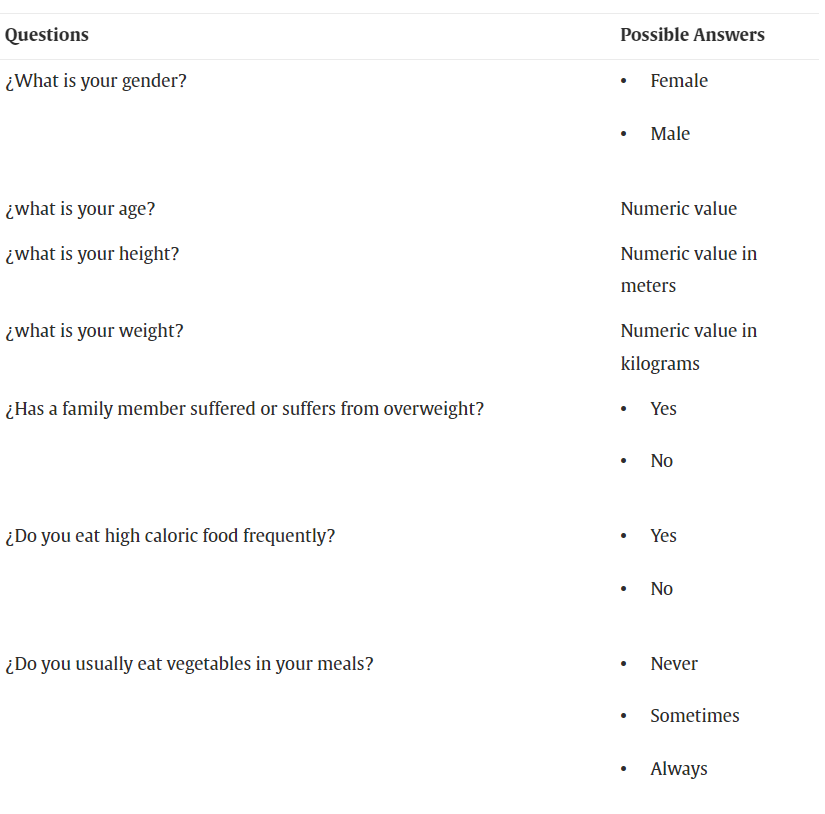
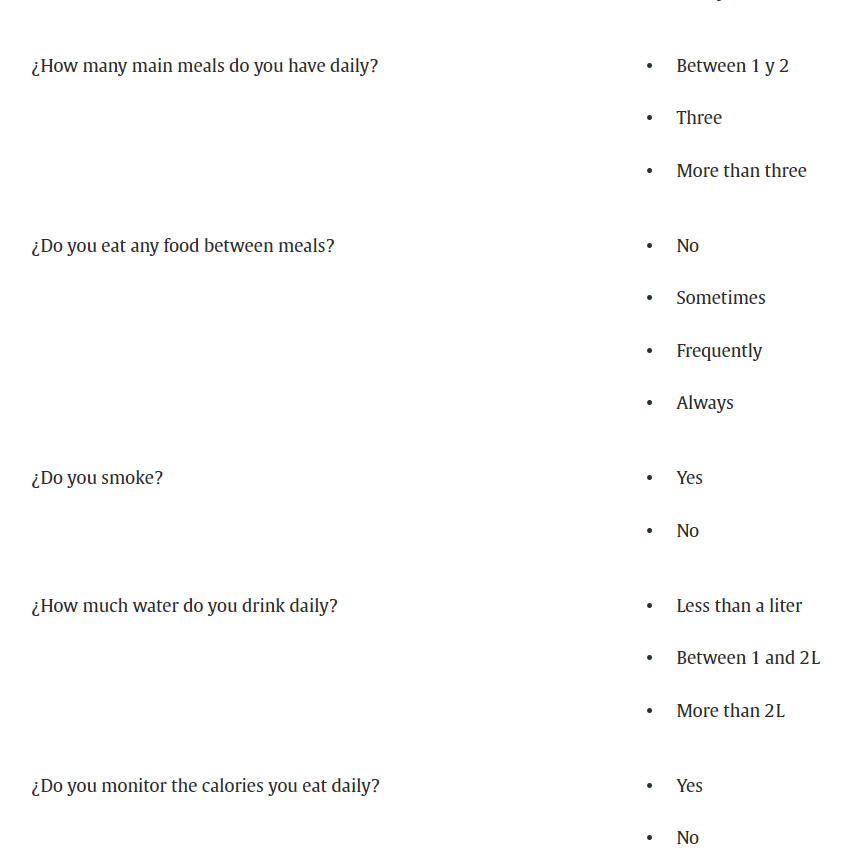
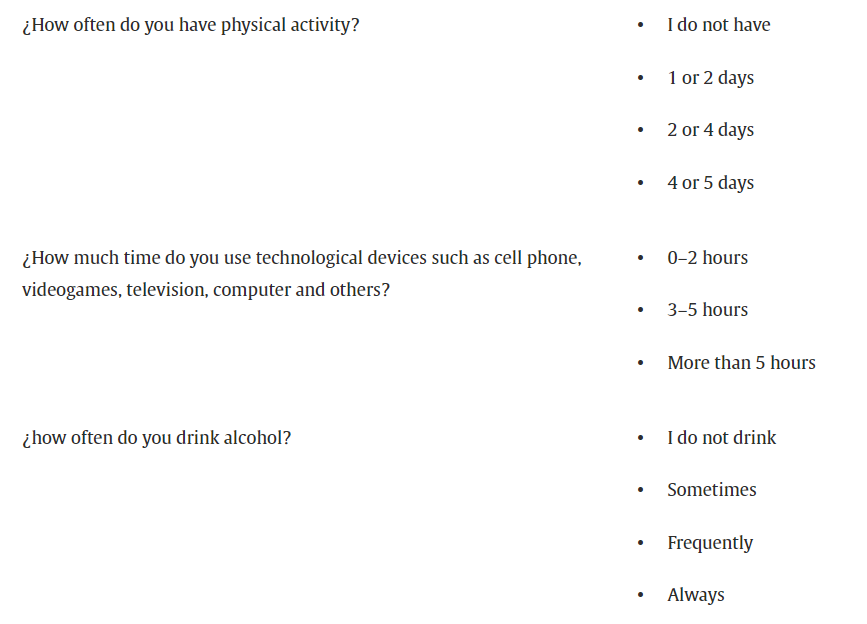
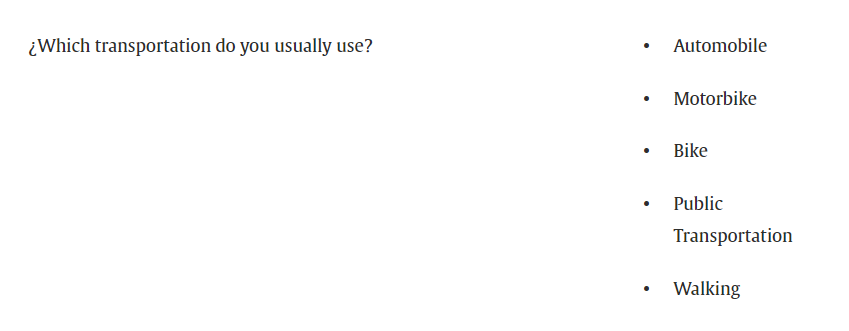

## Basic analysis and data preprocessing

In [3]:
# Top 5 records

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Shape of the data

df.shape

(2111, 17)

In [5]:
# Column names

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [83]:
# Data types of the dataset

df.dtypes

Gender     object
Age       float64
Height    float64
Weight    float64
FHWO       object
FAVC       object
FCVC      float64
NCP       float64
CAEC       object
SMOKE      object
CH2O      float64
SCC        object
FAF       float64
TUE       float64
CALC       object
MTRANS     object
BMI        object
dtype: object

In [6]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# Replacing the column names with short names

df = df.rename(columns={'family_history_with_overweight':'FHWO', 'NObeyesdad':'BMI'})

In [8]:
df.head(1)

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


In [9]:
# Object type columns

object_cols = [col for col in df.columns if df[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(df[col]).issubset(set(df[col]))]

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI']


In [10]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [11]:
# Getting the frequency of unique categories in each column

printf = 'Value Unique {}:\n {} \n'
for count, i in enumerate(good_label_cols):
    val_count = df['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 yes    1726
no      385
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight   

In [12]:
# Checking nul values

df.isna().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

#### Observation:
- There are 0 missing data

In [13]:
# Checking duplicate records

df.duplicated().sum()

24

#### Observation:
- There are 24 duplicate records

#### Dropping fuplicate records

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
# Columns

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

### EDA

**"Gender"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "'Gender' column count plot")

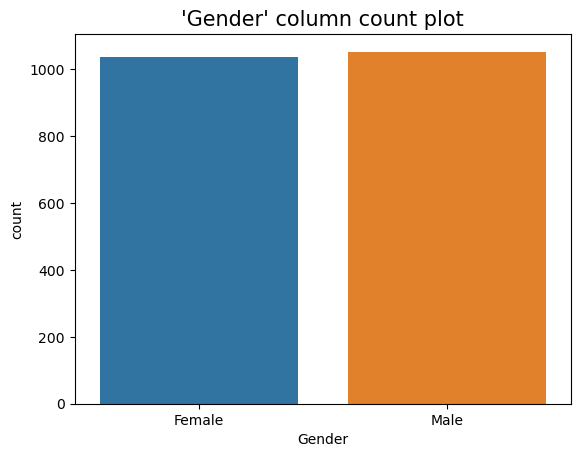

In [16]:
sns.countplot('Gender', data=df, palette="tab10")
plt.title("'Gender' column count plot", fontsize=15)

In [17]:
df['Gender'].value_counts()

Male      1052
Female    1035
Name: Gender, dtype: int64

#### Observation:
- More men are participated in the survey than women

**"Age"**

Text(0.5, 0, 'Age')

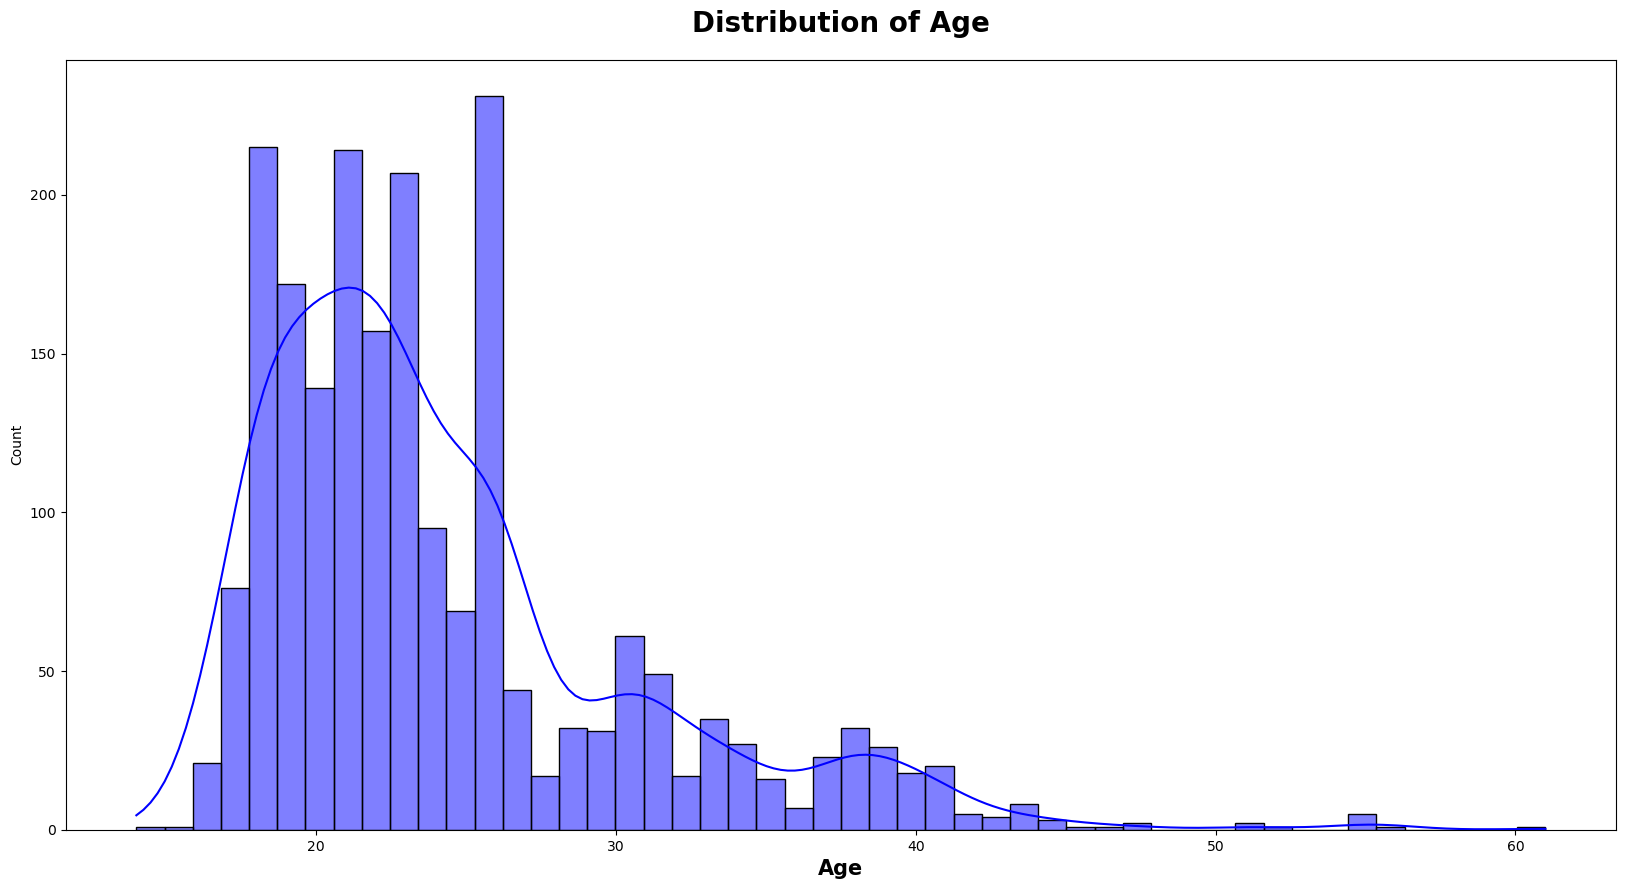

In [18]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Age", x=df.Age, color='b', kde=True)
plt.title("Distribution of Age", weight='bold', fontsize=20, pad=20)
plt.xlabel('Age', weight='bold', fontsize=15)

#### Observation:
- Younger population is more in this survey

In [19]:
df['Age'].max()

61.0

#### Observation:
- In this survey the maximum age of people is 61

In [20]:
df[df['Age']==61]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
133,Female,61.0,1.65,66.0,no,yes,3.0,3.0,Always,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight


#### Observation:
- Person with maximum age is a female with Normal_Weight

In [21]:
df['Age'].min()

14.0

#### Observation:
- In this survey the minimum age of people is 14

In [22]:
df[df['Age']==14]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
415,Male,14.0,1.71,72.0,yes,yes,3.0,3.0,Sometimes,no,3.0,no,2.0,1.0,no,Walking,Normal_Weight


#### Observation:
- Person with maximum age is a male with Normal_Weight

**"Height"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

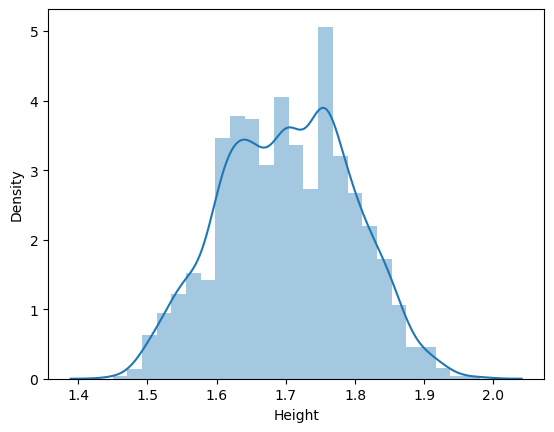

In [23]:
sns.distplot(df['Height'])

In [24]:
df['Height'].value_counts()

1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.800000    28
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64

#### Observation:
- Maximum people are having a height of 1.7 m

**"Weight"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

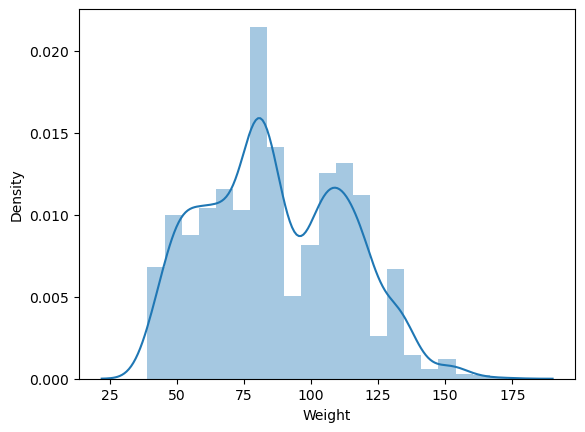

In [25]:
sns.distplot(df['Weight'])

In [26]:
df['Weight'].value_counts()

80.000000     59
50.000000     42
75.000000     39
60.000000     37
70.000000     29
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64

#### Observation:
- In this survey there are more people with weight 80 kg.

**"FHWO"**

Text(0.5, 1.0, 'Feature name : FHWO')

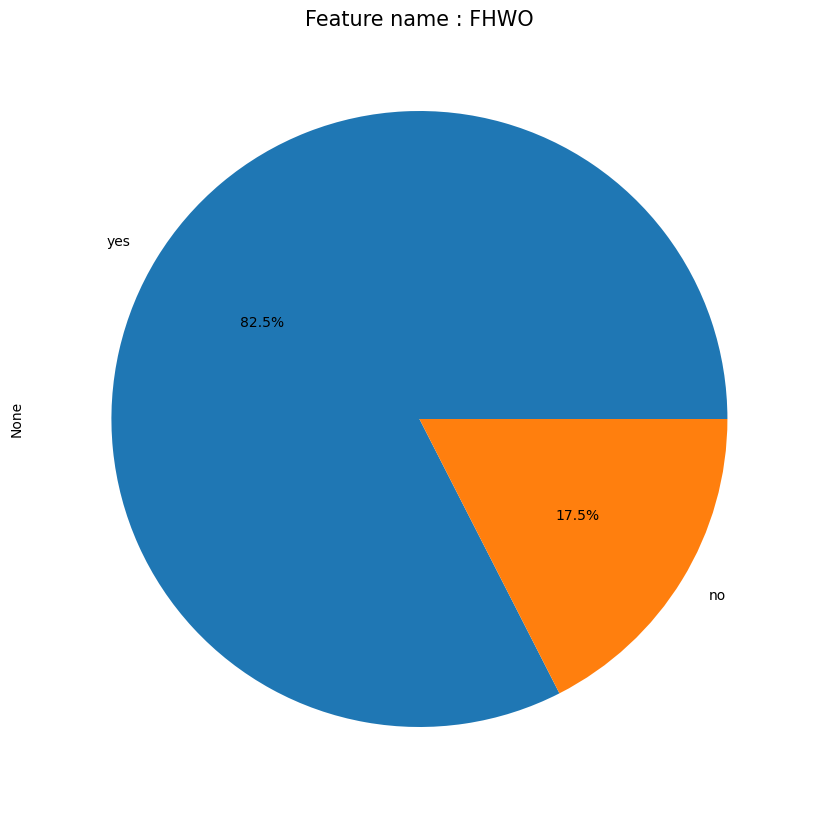

In [27]:
plt.figure(figsize=(20,10))
df.value_counts('FHWO').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : FHWO", fontsize = 15)

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FHWO', ylabel='count'>

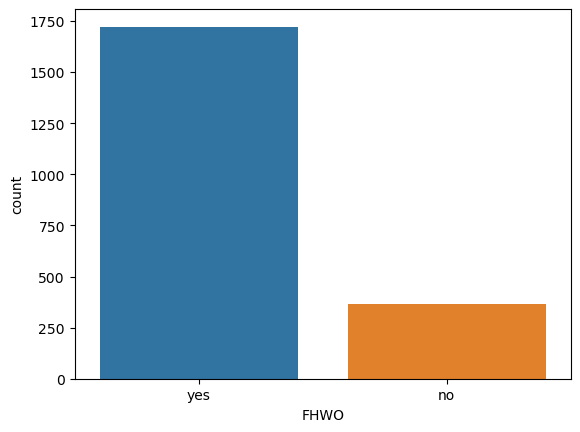

In [28]:
sns.countplot(df['FHWO'])

#### Observation:
- People with family hostory with overweight are more

**"FAVC"**

Text(0.5, 1.0, 'Feature name : FAVC')

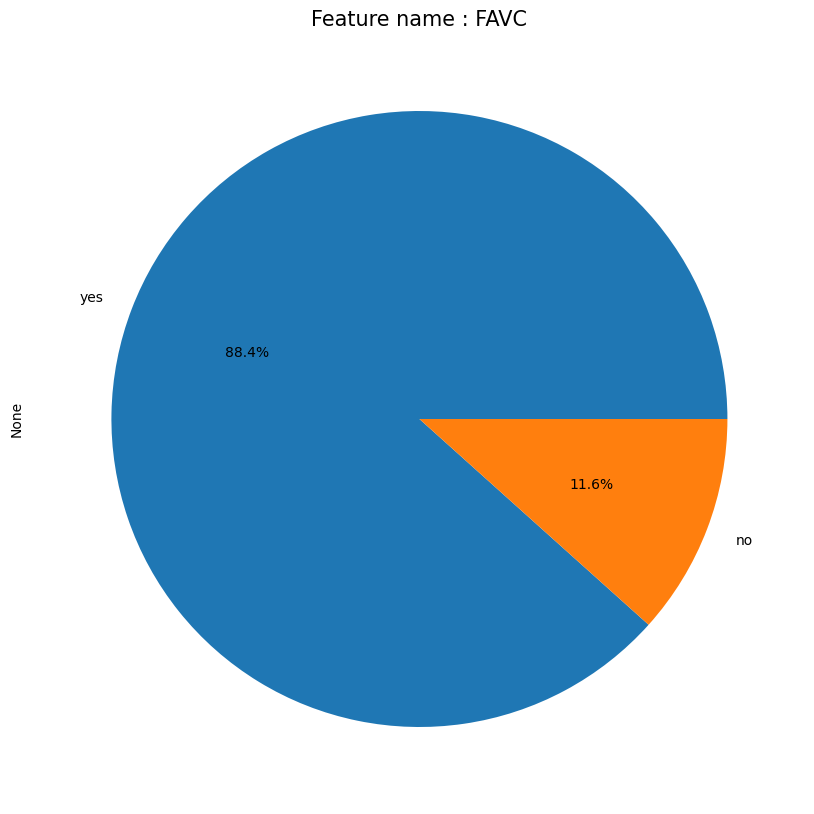

In [29]:
plt.figure(figsize=(20,10))
df.value_counts('FAVC').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : FAVC", fontsize = 15)

#### Observation:
- People with FAVC as no are more

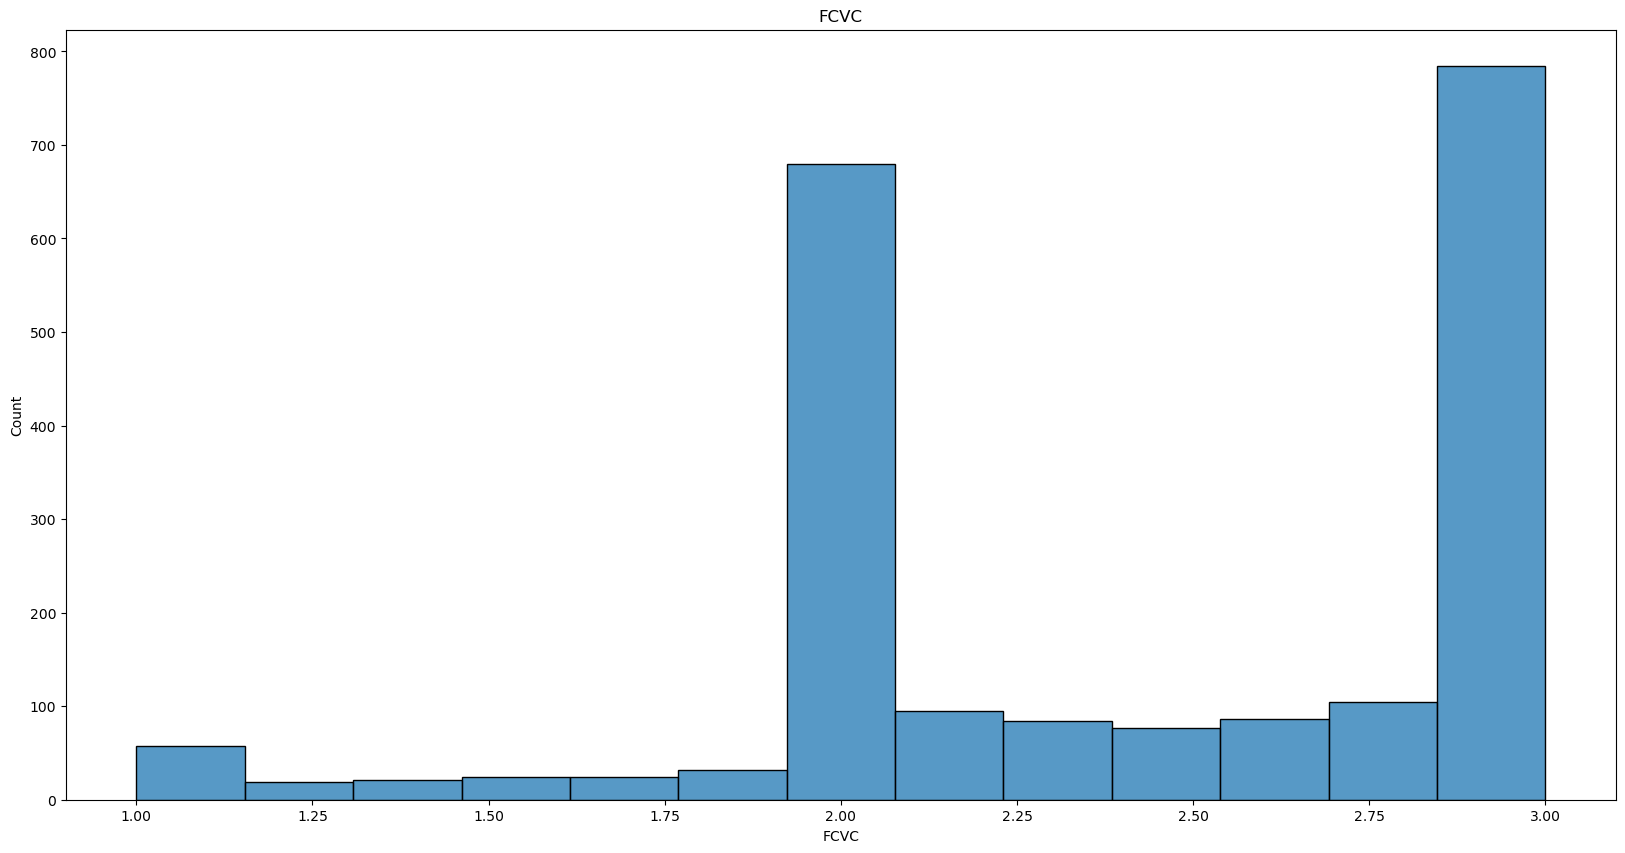

In [30]:
# Histogram

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='FCVC')
plt.title('FCVC')
plt.show()

**"NCP"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NCP'>

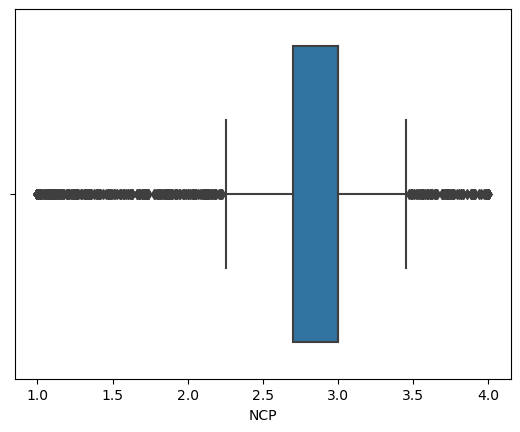

In [31]:
sns.boxplot(df['NCP'])

**"CAEC"**

Text(0.5, 1.0, 'Feature name : CAEC')

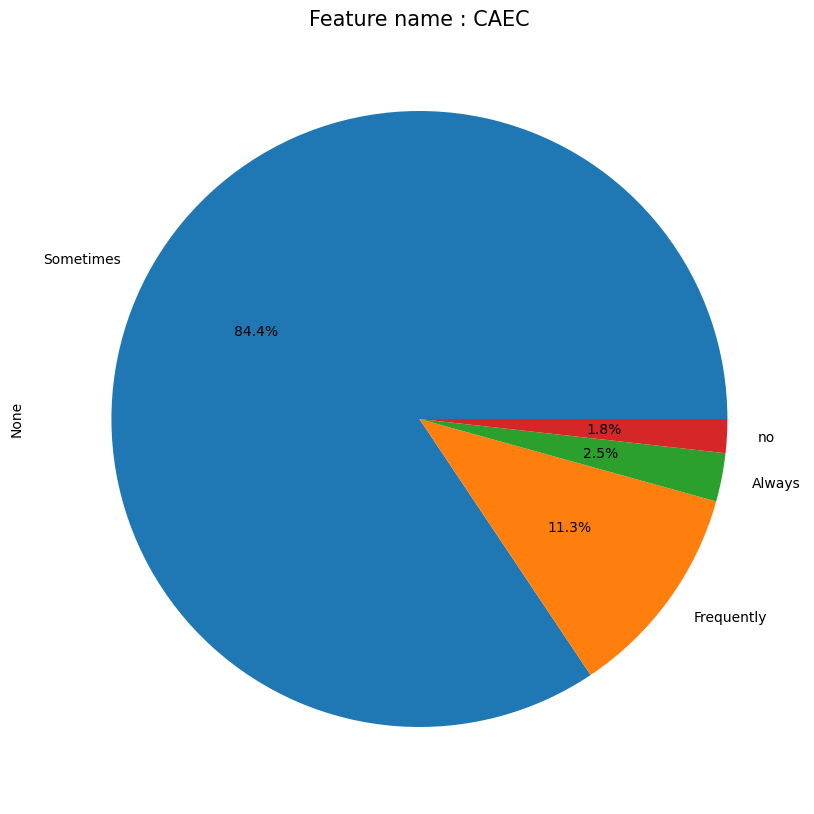

In [32]:
plt.figure(figsize=(20,10))
df.value_counts('CAEC').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : CAEC", fontsize = 15)

**"SMOKE"**

Text(0.5, 1.0, 'Feature name : SMOKE')

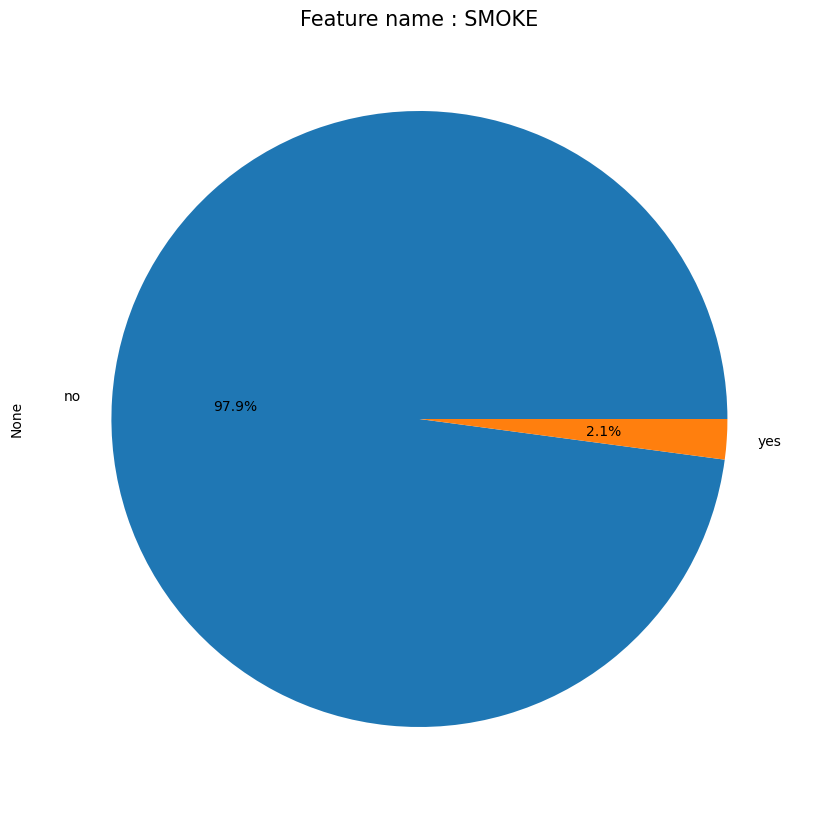

In [33]:
plt.figure(figsize=(20,10))
df.value_counts('SMOKE').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : SMOKE", fontsize = 15)

**"CH2O"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CH2O'>

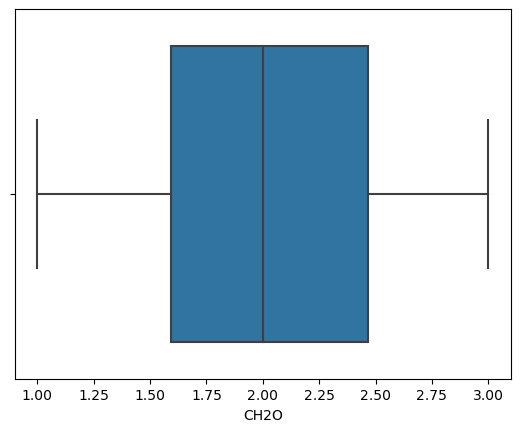

In [34]:
sns.boxplot(df['CH2O'])

**"SCC"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "'SCC' column count plot")

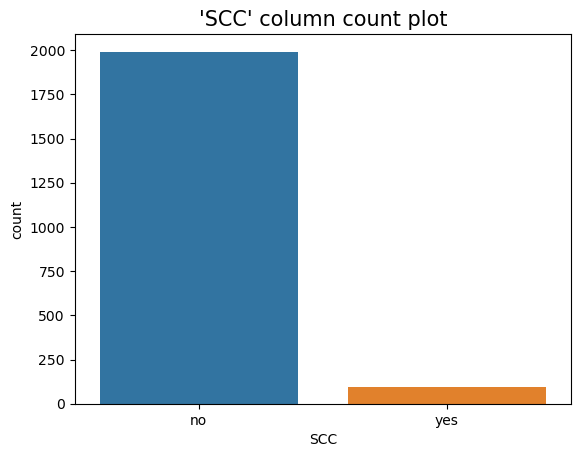

In [35]:
sns.countplot('SCC', data=df, palette="tab10")
plt.title("'SCC' column count plot", fontsize=15)

**"FAF"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FAF', ylabel='Density'>

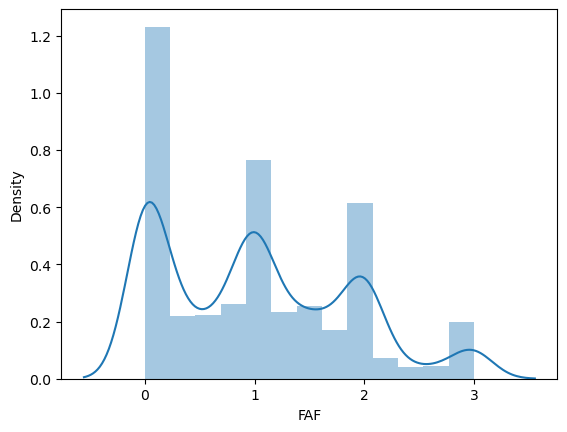

In [36]:
sns.distplot(df['FAF'])

**"TUE"**

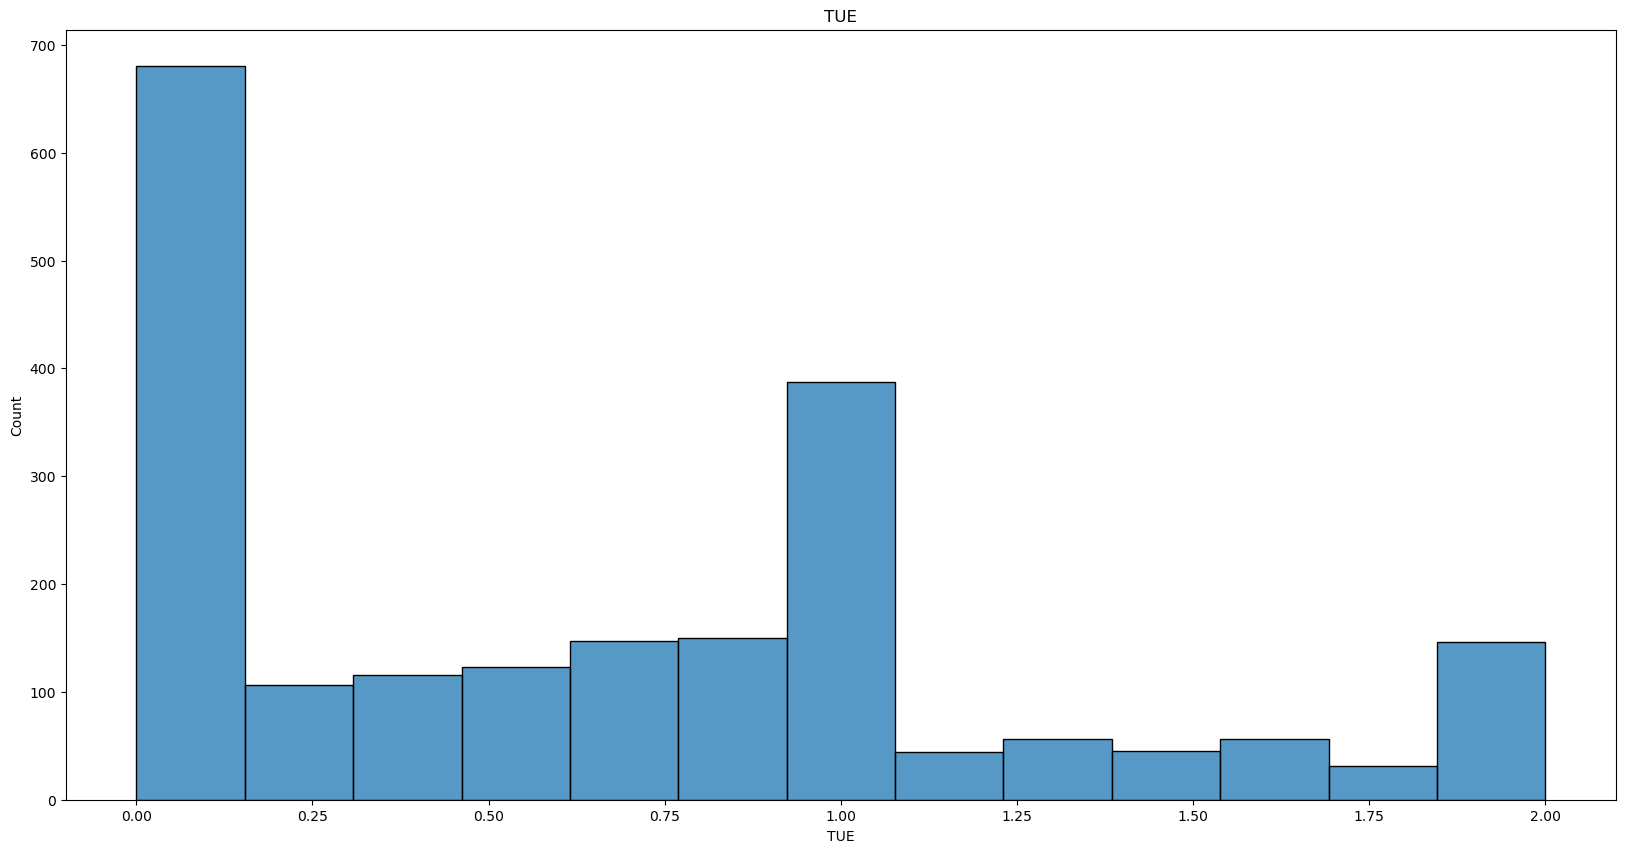

In [37]:
# Histogram

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='TUE')
plt.title('TUE')
plt.show()

**"CALC"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CALC', ylabel='count'>

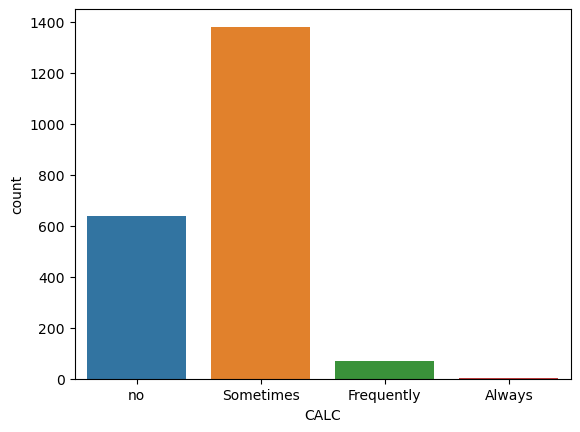

In [38]:
sns.countplot(df['CALC'])

**"MTRANS"**

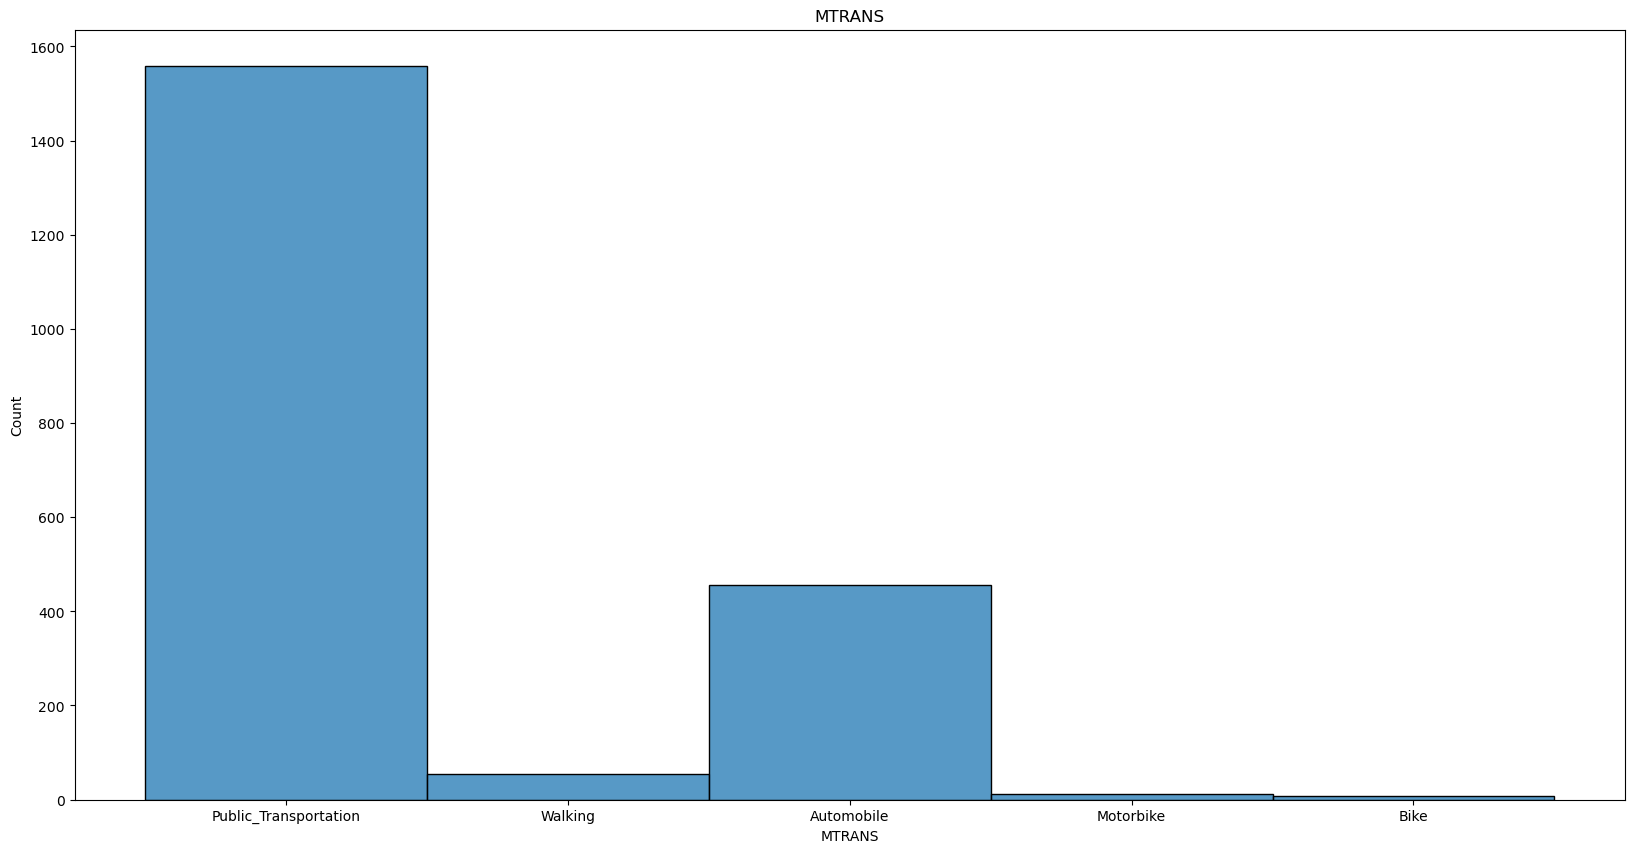

In [39]:
# Histogram

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='MTRANS')
plt.title('MTRANS')
plt.show()

**"BMI"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

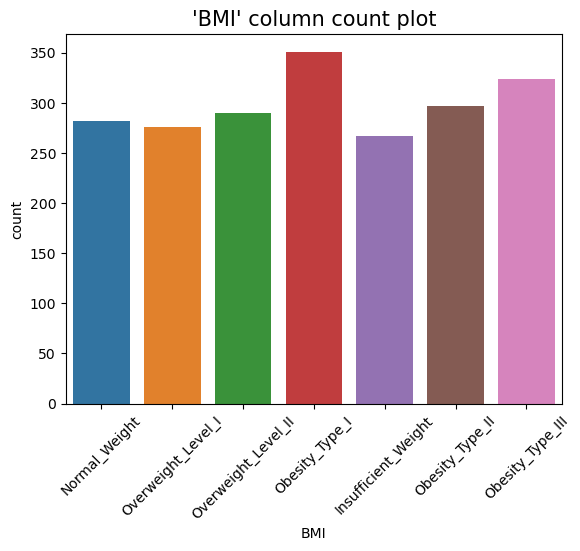

In [40]:
sns.countplot('BMI', data=df, palette="tab10")
plt.title("'BMI' column count plot", fontsize=15)
plt.xticks(rotation=45)

#### Observation:
- Classes in the BMI column are not uniformly distributed

## Bivariate Analysis

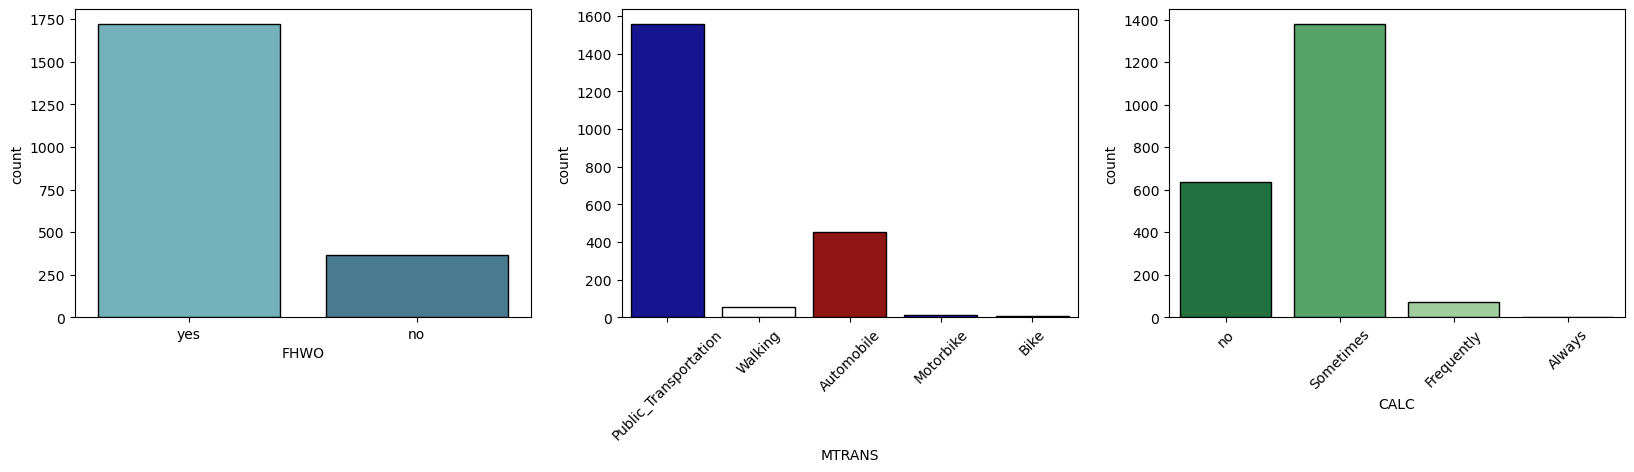

In [41]:
# Plotting frequency of 'FHWO', 'MTRANS', 'CALC' columns

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

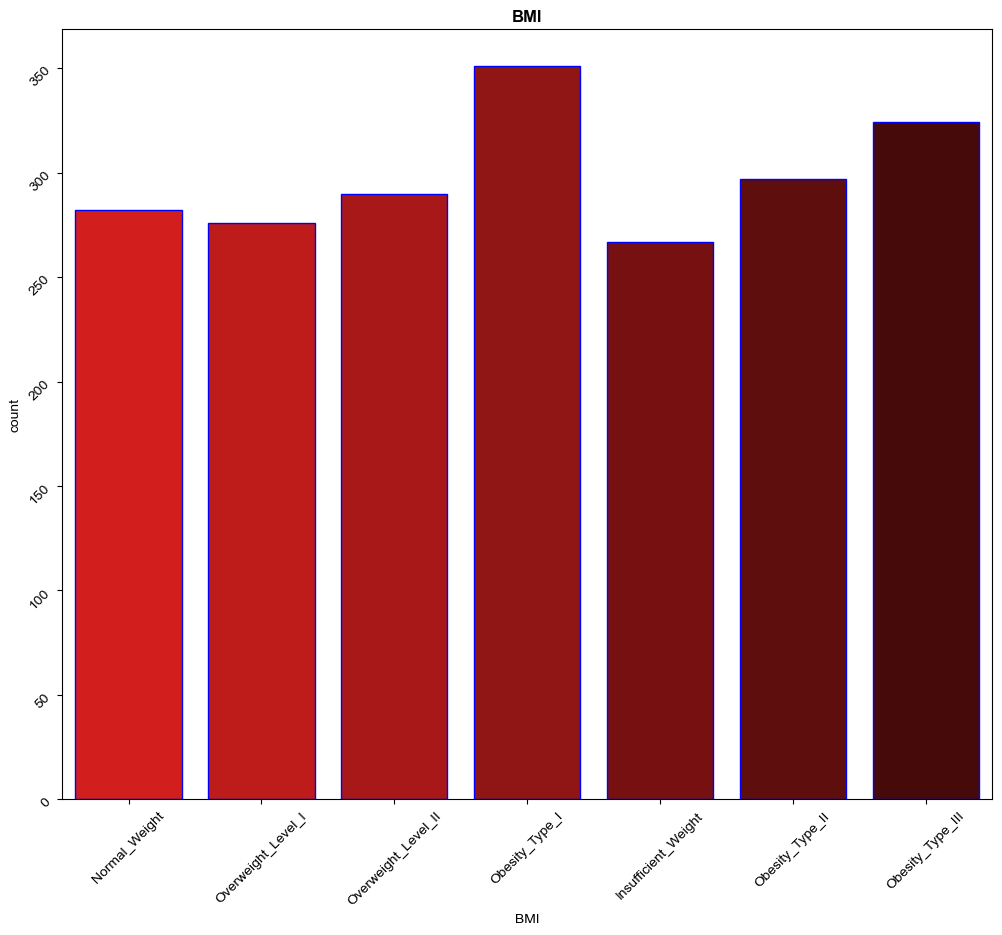

In [42]:
# Plotting frequency of 'BMI' column

plt.figure(figsize=(12,10))
sns.countplot(x="BMI",data=df,palette="flag",edgecolor="blue")
plt.title('BMI', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

In [43]:
# Making a copy of dataset

data_transform = df.copy()

In [44]:
# To encode the categorical columns

ordinal_encoder = OrdinalEncoder()

In [45]:
# Transforming the "good_label_cols" data

data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])

### Multivariate Analysis

In [46]:
# Finding the correlation in the dataset

corr = data_transform.corr()

<AxesSubplot:>

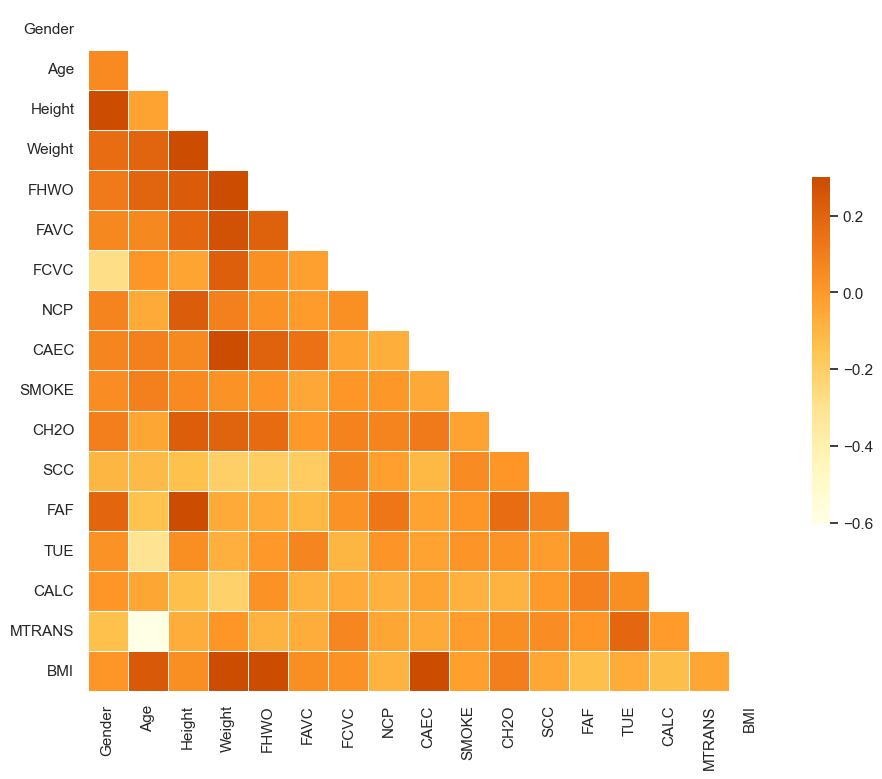

In [47]:
# Plotting 'AxesSubplot' to display correlation

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature selection

In [48]:
# Feature selection as input feature and label

X = data_transform[['Gender','Age','Height','Weight','FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC','SMOKE', 'CH2O', 'SCC', 'FAF','TUE', 'CALC','MTRANS']]
y = data_transform['BMI']

Class=1, n=282 (13.512%)
Class=5, n=276 (13.225%)
Class=6, n=290 (13.896%)
Class=2, n=351 (16.818%)
Class=0, n=267 (12.793%)
Class=3, n=297 (14.231%)
Class=4, n=324 (15.525%)


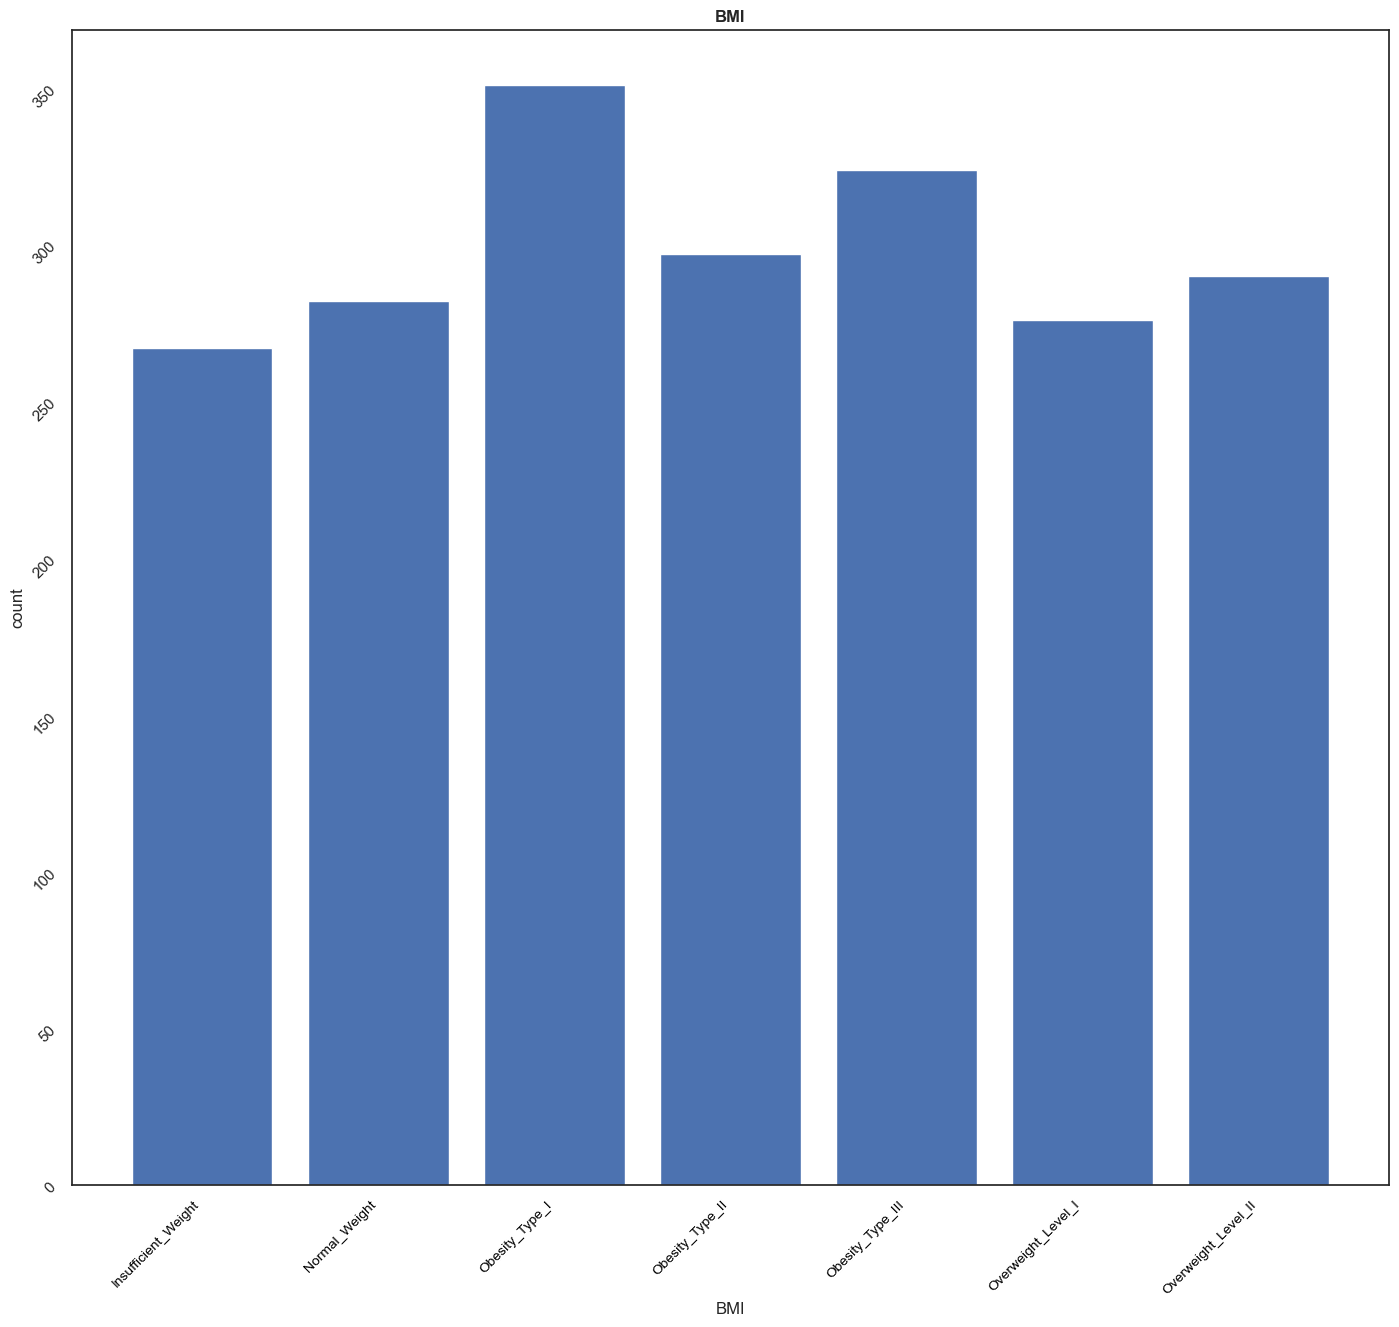

In [49]:
# Analysis of BMI column

from collections import Counter


# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
bars = ('Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II')
y_pos = np.arange(len(bars))

plt.figure(figsize=(17,15))
plt.title('BMI', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('BMI')
plt.ylabel("count")
plt.bar(counter.keys(), counter.values())
plt.xticks(y_pos, bars, color='black', rotation=45, fontweight='normal', fontsize='10', horizontalalignment='right')
plt.show()

In [50]:
# Handling the imbalanced dataset

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=351 (14.286%)
Class=5, n=351 (14.286%)
Class=6, n=351 (14.286%)
Class=2, n=351 (14.286%)
Class=0, n=351 (14.286%)
Class=3, n=351 (14.286%)
Class=4, n=351 (14.286%)


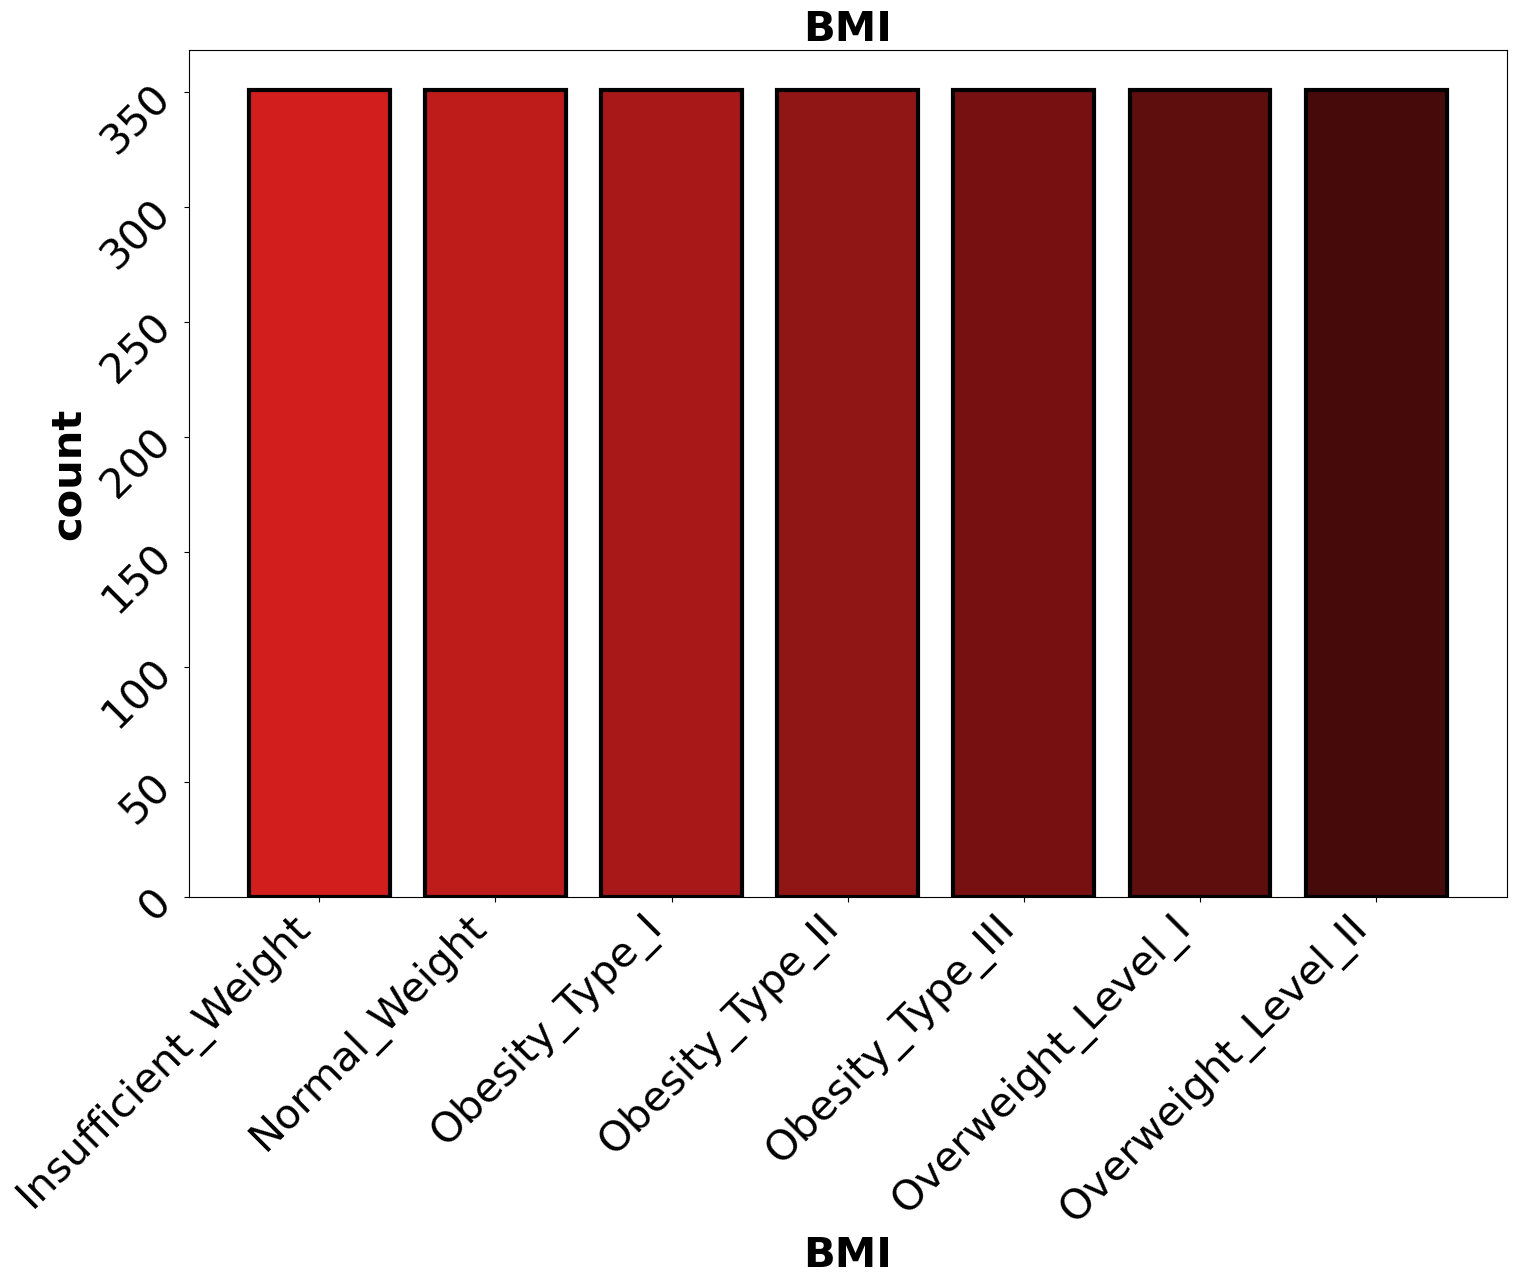

In [51]:
c = ['#be1b1b', '#5f0e0e', '#460a0a', '#a81818', '#d31e1e', '#901515', '#771111']

# plot the distribution

plt.figure(figsize=(17,11))
plt.style.use('default') #dark_background
plt.title('BMI', weight='bold', fontsize='30')

#plt.xticks(rotation=45)
#plt.rc('xtick',labelsize=18)
plt.xlabel('BMI', weight='bold', fontsize='30')
plt.ylabel("count", weight='bold', fontsize='30')
plt.bar(counter.keys(), counter.values(), fill = True, edgecolor = 'black', linewidth=3.0, color=c)
plt.xticks(y_pos, bars, color='black', rotation=45, fontweight='normal', fontsize='30', horizontalalignment='right')
plt.yticks(rotation=45, fontsize='30')
plt.savefig('balanced_data.png', bbox_inches='tight', pad_inches=0.0, transparent=True)

In [52]:
# Shape of the data

data_transform.shape

(2087, 17)

### Splitting dataset

In [53]:
# Getting the feature and label

X = data_transform.iloc[:,:-1]
y = data_transform.iloc[:,-1]

In [54]:
# Splitting dataset

from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

## Model building
#### logistic regression

In [55]:
# defining pipelinr for logistic regression model

pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000)) #step2 - classifier
    ])

In [56]:
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]

In [57]:
# doing cross validation to etter fit the model with unseen data

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.13900161, 0.11999536, 0.10600543, 0.11799455, 0.0909996 ]),
 'score_time': array([0.00399828, 0.00200248, 0.00200176, 0.002002  , 0.00199914]),
 'test_score': array([0.88922156, 0.87724551, 0.8502994 , 0.86227545, 0.84984985])}

In [58]:
scores['test_score'].mean()

0.8657783532035029

## Other Classification Algorithm
### Evaluating all at once

In [59]:
clfs = []
clfs.append(LogisticRegression(solver='lbfgs', max_iter=1000))
clfs.append(SVC())
clfs.append(KNeighborsClassifier())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(LGBMClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', '{:.5f}'.format(values.mean()))
            print(key,' std ', '{:.5f}'.format(values.std()))

---------------------------------
LogisticRegression(max_iter=1000)
-----------------------------------
fit_time  mean  0.10901
fit_time  std  0.01147
score_time  mean  0.00260
score_time  std  0.00080
test_score  mean  0.86578
test_score  std  0.01541
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.08000
fit_time  std  0.00874
score_time  mean  0.04241
score_time  std  0.00886
test_score  mean  0.87118
test_score  std  0.00787
---------------------------------
KNeighborsClassifier()
-----------------------------------
fit_time  mean  0.00581
fit_time  std  0.00161
score_time  mean  0.03038
score_time  std  0.00403
test_score  mean  0.79147
test_score  std  0.01594


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.01280
fit_time  std  0.00223
score_time  mean  0.00260
score_time  std  0.00049
test_score  mean  0.93229
test_score  std  0.01086
---------------------------------
RandomForestClassifier()
-----------------------------------
fit_time  mean  0.36940
fit_time  std  0.00387
score_time  mean  0.02280
score_time  std  0.00349
test_score  mean  0.95026
test_score  std  0.00651
---------------------------------
GradientBoostingClassifier()
-----------------------------------
fit_time  mean  2.45682
fit_time  std  0.23041
score_time  mean  0.00878
score_time  std  0.00160
test_score  mean  0.95327
test_score  std  0.00721
---------------------------------
LGBMClassifier()
-----------------------------------
fit_time  mean  1.20919
fit_time  std  0.14895
score_time  mean  0.01400
score_time  std  0.00261
test_score  mean  0.97064
test_score  std  0.00351


### Cross-Validation and Hyper Parameters Tuning
# Decision Tree model building

In [60]:
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(1,50)),
              }

In [61]:
# To find the best parameters

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=10)

grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ['best', 'random']})

In [62]:
gridDT = grid.best_params_
print(gridDT)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [63]:
clf = DecisionTreeClassifier(criterion=gridDT['criterion'],splitter=gridDT['splitter'],max_depth=gridDT['max_depth'])

In [64]:
# Model fitting and predicting

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [65]:
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro"))

Accuracy score:  0.9473684210526315
Precision score:  0.9462553342635731
Recall:  0.9457320133524204
F1 score:  0.9451868307380614
ROC-AUC score 0.9683436744555787


# Random Forest model building

In [66]:
#RandomForest
n_estimators = [int(x) for x in range(8, 30,1)]
criterion = ['gini','entropy']
max_depth = [int(x) for x in range(1, 50, 1)]
param_grid = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }

In [67]:
# To find the best parameters

grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_estimators': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                          18, 19, 20, 21, 22, 23, 24, 25, 26,
                                          27, 28, 29]})

In [68]:
gridRF = grid.best_params_
print(gridRF)

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 21}


In [69]:
# Model fitting and predicting

clf = RandomForestClassifier(criterion=gridRF['criterion'],n_estimators=gridRF['n_estimators'],max_depth=gridRF['max_depth'])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [70]:
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro"))

Accuracy score:  0.9593301435406698
Precision score:  0.9613220113220114
Recall:  0.9585899112059738
F1 score:  0.9586472535332773
ROC-AUC score 0.9984082935435965


# SVC model building

In [71]:
#SVC

pipeline.set_params(clf= SVC())
pipeline.steps

[('normalizer', StandardScaler()), ('clf', SVC())]

In [72]:
# To find the best parameters

cv_grid = GridSearchCV(pipeline, param_grid = {'clf__kernel' : ['linear', 'rbf'],
'clf__C' : np.linspace(0.1,1.2,12)})

cv_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
                         'clf__kernel': ['linear', 'rbf']})

In [73]:
cv_grid.best_params_

{'clf__C': 1.2, 'clf__kernel': 'linear'}

In [74]:
cv_grid.best_estimator_

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', SVC(C=1.2, kernel='linear'))])

In [75]:
cv_grid.best_score_

0.9466742191293089

In [76]:
# Model fitting and predicting

y_pred = cv_grid.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))

Accuracy score:  0.9665071770334929
Precision score:  0.9658987535692243
Recall:  0.9658613864205969
F1 score:  0.9655361238330576


# LBGM model building

In [77]:
#LGBM
param_grid = {'n_estimators': [100,200,500, 1000, 2000],
    'boosting_type' : ['gbdt', 'dart', 'goss']}

In [78]:
# To find the best parameters

grid = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=4,return_train_score=True, verbose=3, n_jobs=-1)

In [79]:
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
{'boosting_type': 'dart', 'n_estimators': 500}


In [80]:
# Model fitting and predicting

clf = LGBMClassifier(boosting_type='goss', n_estimators = 2000)

clf.fit(X_train,y_train)

LGBMClassifier(boosting_type='goss', n_estimators=2000)

In [81]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [82]:
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro"))

Accuracy score:  0.9760765550239234
Precision score:  0.9750631057931568
Recall:  0.9757877218775928
F1 score:  0.9753258657127386
ROC-AUC score 0.9994261549624013
